# YOLOv8 para Leitura de Glicosímetros

### Instalação e Configuração

In [2]:
%pip install ultralytics roboflow

  Using cached ultralytics-8.3.166-py3-none-any.whl.metadata (37 kB)
  Using cached roboflow-1.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached pillow-11.3.0-cp312-cp312-win_amd64.whl.metadata (9.2 kB)
  Using cached scipy-1.16.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached torch-2.7.1-cp312-cp312-win_amd64.whl.metadata (28 kB)
  Using cached torchvision-0.22.1-cp312-cp312-win_amd64.whl.metadata (6.1 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cache


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\pedro\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="Z1wyDWMNAv21MSTpQuY6")
project = rf.workspace("glucoocr").project("glycometre-fi2xq")
version = project.version(2)
dataset = version.download("yolov8")        

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to glycometre-2 in yolov8:: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 35712/35712 [00:21<00:00, 1658.00it/s]


In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="Z1wyDWMNAv21MSTpQuY6")
project = rf.workspace("glucoocr").project("glycometre-fi2xq")
version = project.version(2)

loading Roboflow workspace...
loading Roboflow project...


In [3]:
version = project.version(2)
print(version.available_formats)

AttributeError: 'Version' object has no attribute 'available_formats'

### Arquivos

In [2]:
!ls glycometre-2/train | head
!cat glycometre-2/data.yaml

images
labels
names:
- '0'
- '1'
- '10'
- '11'
- '12'
- '14'
- '15'
- '2'
- '3'
- '4'
- '5'
- '6'
- '7'
- '8'
- '9'
nc: 15
roboflow:
  license: CC BY 4.0
  project: glycometre-fi2xq
  url: https://universe.roboflow.com/glucoocr/glycometre-fi2xq/dataset/2
  version: 2
  workspace: glucoocr
test: ../test/images
train: ../train/images
val: ../valid/images


### Exploração dados de treinamento
Fazer

#### Hiperparâmetros

In [8]:
import yaml
from pprint import pprint

args_path = os.path.join(results.save_dir, "args.yaml")

with open(args_path, 'r') as f:
    args = yaml.safe_load(f)

print("📌 Hiperparâmetros utilizados no treino:")
pprint(args)

NameError: name 'results' is not defined

#### Labels

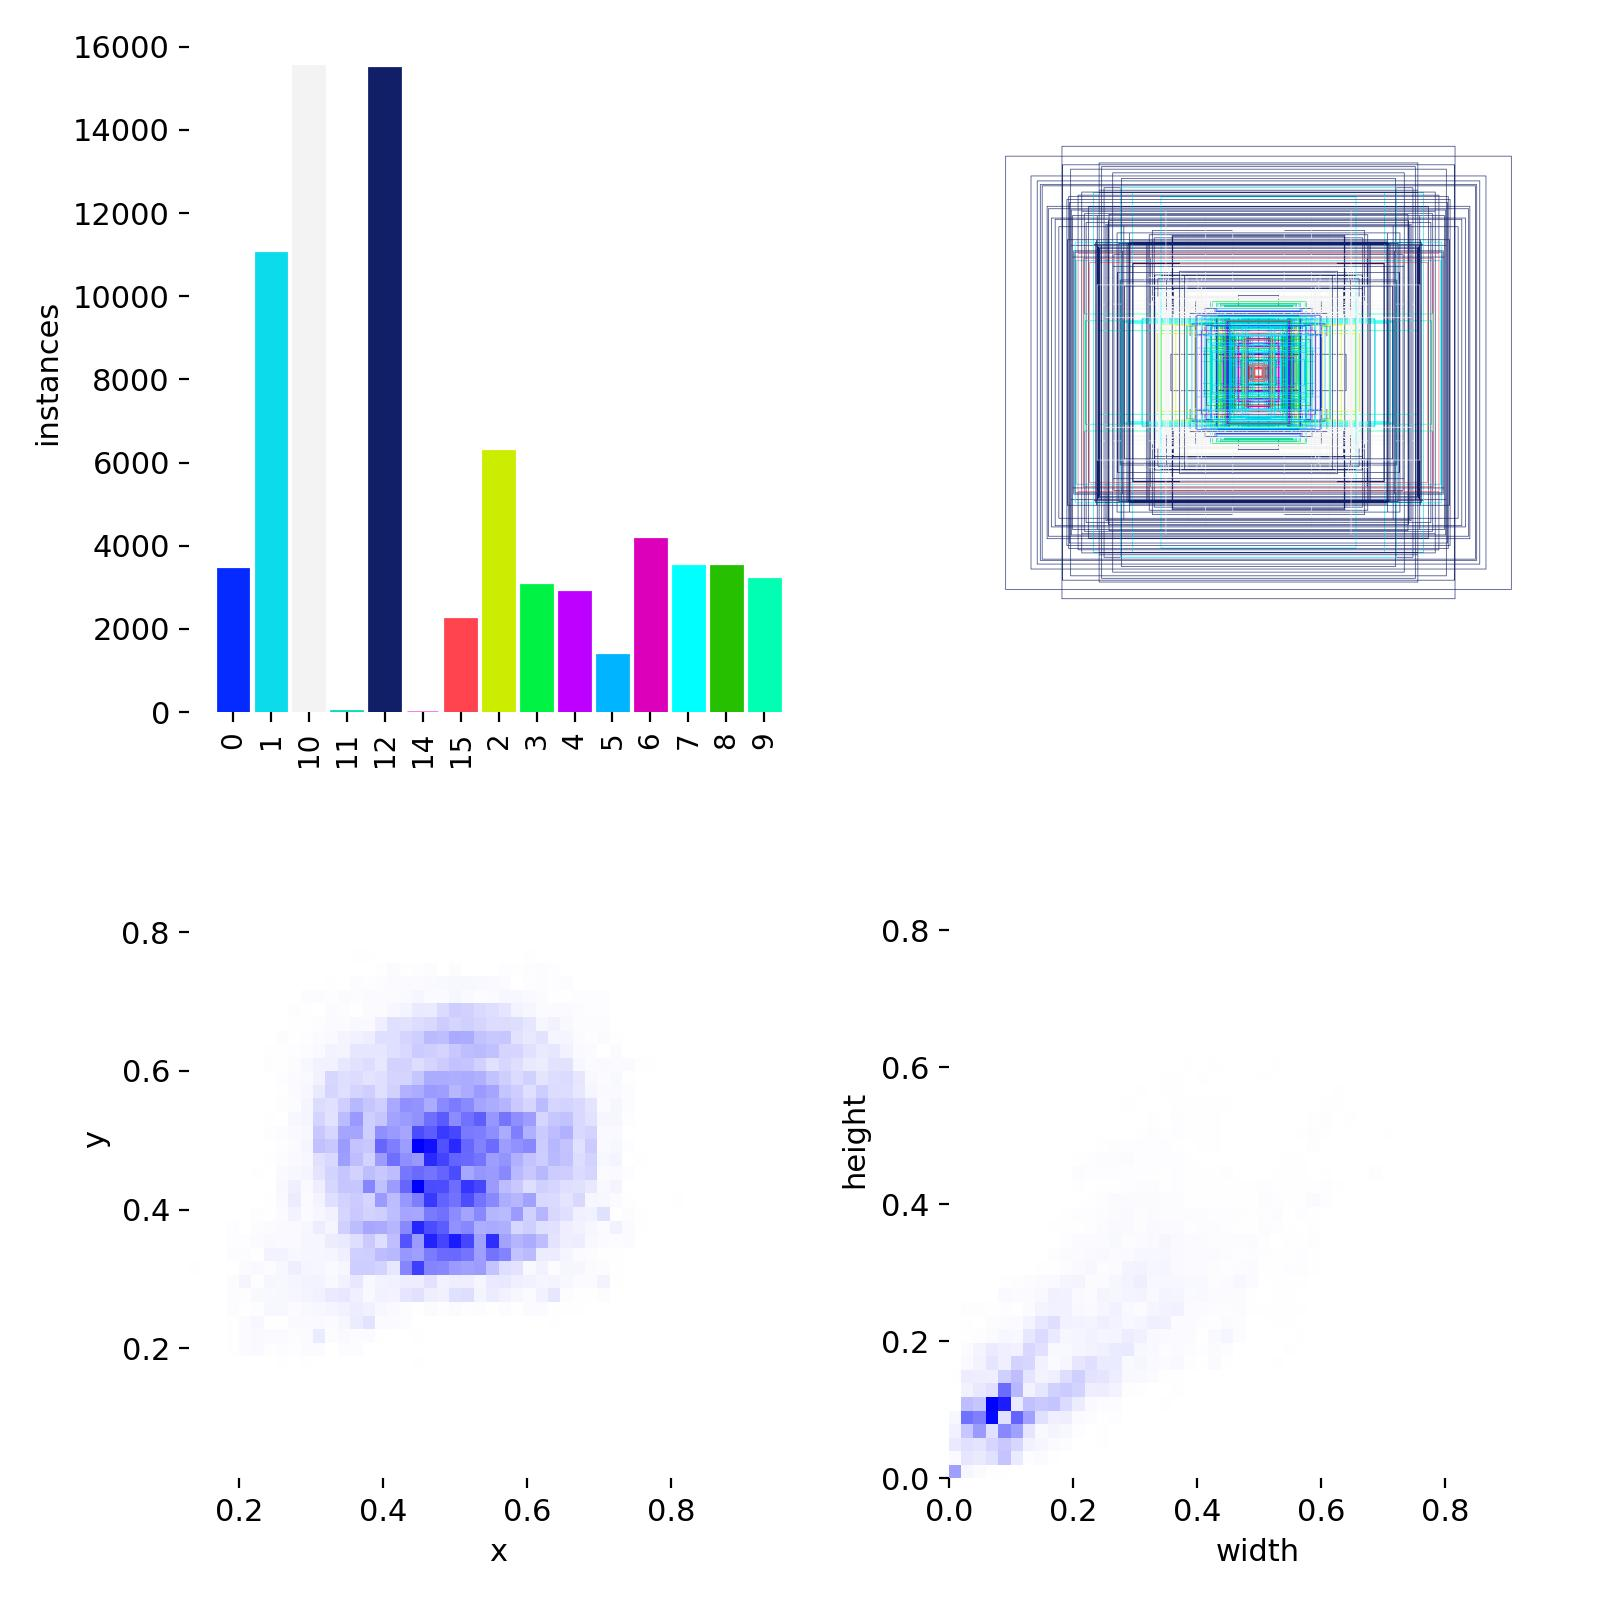

In [3]:
from IPython.display import Image, display
import os
display(Image(filename="runs/detect/train2/labels.jpg"))

### Treinamento

In [3]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data=f"glycometre-2/data.yaml", device=0, epochs=50, imgsz=640)

Ultralytics 8.3.166  Python-3.12.6 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=glycometre-2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretr

train: Scanning E:\tcc-yolo\glycometre-2\train\labels... 15620 images, 0 backgrounds, 0 corrupt: 100%|██████████| 15620/15620 [00:38<00:00, 406.92it/s]

train: E:\tcc-yolo\glycometre-2\train\images\img10878_jpg.rf.133f11cc28ed73c90bb958adc100c662.jpg: 1 duplicate labels removed
train: E:\tcc-yolo\glycometre-2\train\images\img10878_jpg.rf.3ec8c8fd6e275207668a10a978726260.jpg: 1 duplicate labels removed
train: E:\tcc-yolo\glycometre-2\train\images\img10878_jpg.rf.74056857f84ad8a2bc1b52efd889f024.jpg: 1 duplicate labels removed
train: E:\tcc-yolo\glycometre-2\train\images\img10878_jpg.rf.ab83d5a47cf31c9d9cd95d49575afe74.jpg: 1 duplicate labels removed
train: E:\tcc-yolo\glycometre-2\train\images\img10878_jpg.rf.b37bbfcf711867a8359f446589ccce83.jpg: 1 duplicate labels removed
train: E:\tcc-yolo\glycometre-2\train\images\img10878_jpg.rf.c6cee1debb57b46677d3f28be317e51b.jpg: 1 duplicate labels removed
train: E:\tcc-yolo\glycometre-2\train\images\img_440_jpg.rf.3454b20c5842ecd497487990cade4c1c.jpg: 1 duplicate labels removed
train: E:\tcc-yolo\glycometre-2\train\images\img_440_jpg.rf.e1142d3bd3c8a66cf540048a1b9805df.jpg: 1 duplicate labels re

train: New cache created: E:\tcc-yolo\glycometre-2\train\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 17870, len(boxes) = 75751. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
val: Fast image access  (ping: 0.80.5 ms, read: 3.00.9 MB/s, size: 44.4 KB)


val: Scanning E:\tcc-yolo\glycometre-2\valid\labels... 1508 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1508/1508 [00:04<00:00, 345.71it/s]

val: E:\tcc-yolo\glycometre-2\valid\images\img_440_jpg.rf.e5abb138aae2240a7a1a6f210153f41f.jpg: 1 duplicate labels removed
val: E:\tcc-yolo\glycometre-2\valid\images\img_519_jpg.rf.cc0c35e5598d809f236506d6bac471ad.jpg: 3 duplicate labels removed


val: New cache created: E:\tcc-yolo\glycometre-2\valid\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 1655, len(boxes) = 7315. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.16G       1.21      2.131      1.265         33        640: 100%|██████████| 977/977 [02:26<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.78it/s]


                   all       1508       7315      0.845      0.687      0.731      0.557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.47G      1.025      1.126      1.155         49        640: 100%|██████████| 977/977 [02:16<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.37it/s]


                   all       1508       7315      0.846      0.793      0.796      0.607

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.49G      1.025     0.9958       1.15         51        640: 100%|██████████| 977/977 [02:13<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.39it/s]

                   all       1508       7315      0.901      0.808      0.824      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.49G      1.014     0.8823      1.144         31        640: 100%|██████████| 977/977 [02:11<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.40it/s]

                   all       1508       7315      0.933      0.841      0.849      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.51G     0.9715     0.7721      1.119         22        640: 100%|██████████| 977/977 [02:10<00:00,  7.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.37it/s]

                   all       1508       7315      0.915      0.838      0.843      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.52G     0.9463     0.7161      1.104         43        640: 100%|██████████| 977/977 [02:10<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.39it/s]

                   all       1508       7315      0.921      0.855      0.862      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.53G     0.9285      0.683      1.095         37        640: 100%|██████████| 977/977 [02:11<00:00,  7.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.32it/s]

                   all       1508       7315      0.937      0.856      0.862      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.54G      0.907     0.6548      1.085         22        640: 100%|██████████| 977/977 [02:11<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.40it/s]

                   all       1508       7315      0.917      0.865      0.852      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.55G     0.8943     0.6321      1.077         26        640: 100%|██████████| 977/977 [02:11<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.37it/s]

                   all       1508       7315      0.921      0.859      0.863       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.57G     0.8886     0.6215      1.075         12        640: 100%|██████████| 977/977 [02:11<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.36it/s]

                   all       1508       7315      0.939      0.867      0.873      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.58G      0.878     0.6066      1.068         32        640: 100%|██████████| 977/977 [02:11<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.39it/s]

                   all       1508       7315      0.946      0.855      0.875      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.58G     0.8663     0.5886       1.06         45        640: 100%|██████████| 977/977 [02:11<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.38it/s]

                   all       1508       7315      0.937      0.869      0.874      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.6G     0.8578     0.5797      1.054         30        640: 100%|██████████| 977/977 [02:17<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.19it/s]

                   all       1508       7315      0.934       0.87      0.873      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.61G     0.8503     0.5718      1.052         33        640: 100%|██████████| 977/977 [02:21<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.14it/s]

                   all       1508       7315      0.939      0.866      0.877        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.62G     0.8437     0.5667      1.049         19        640: 100%|██████████| 977/977 [02:22<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:13<00:00,  3.66it/s]

                   all       1508       7315      0.934      0.872      0.878      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.62G     0.8377     0.5539      1.046         30        640: 100%|██████████| 977/977 [02:21<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.01it/s]

                   all       1508       7315      0.938      0.869      0.874      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.65G     0.8335     0.5485      1.046         49        640: 100%|██████████| 977/977 [02:17<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.31it/s]

                   all       1508       7315      0.944      0.873      0.885      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.66G      0.824     0.5417      1.039         34        640: 100%|██████████| 977/977 [02:15<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.30it/s]

                   all       1508       7315      0.944      0.873      0.889      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.67G     0.8197     0.5345      1.035         19        640: 100%|██████████| 977/977 [02:14<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.32it/s]

                   all       1508       7315       0.94      0.871      0.884      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.67G     0.8148     0.5299      1.036         34        640: 100%|██████████| 977/977 [02:25<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.34it/s]

                   all       1508       7315      0.936      0.882      0.882      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.69G     0.8127     0.5261      1.033         46        640: 100%|██████████| 977/977 [02:12<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.34it/s]

                   all       1508       7315      0.945      0.875      0.888      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50       2.7G     0.8085     0.5236       1.03         20        640: 100%|██████████| 977/977 [02:11<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.31it/s]

                   all       1508       7315      0.941      0.879      0.917      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.71G     0.7998     0.5126      1.029         44        640: 100%|██████████| 977/977 [02:11<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.36it/s]

                   all       1508       7315      0.935       0.88      0.925      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.72G     0.7957      0.513      1.027         30        640: 100%|██████████| 977/977 [02:12<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.35it/s]

                   all       1508       7315      0.943      0.876      0.934      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.74G     0.7921     0.5083      1.023         19        640: 100%|██████████| 977/977 [02:11<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.32it/s]

                   all       1508       7315       0.94      0.922      0.931      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.75G     0.7883     0.4982      1.021         40        640: 100%|██████████| 977/977 [02:25<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.26it/s]

                   all       1508       7315      0.923      0.918      0.933       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.76G     0.7851     0.4953      1.017         28        640: 100%|██████████| 977/977 [02:19<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.93it/s]

                   all       1508       7315      0.929      0.915      0.934      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.77G     0.7797     0.4889      1.018         20        640: 100%|██████████| 977/977 [02:14<00:00,  7.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.29it/s]

                   all       1508       7315      0.942      0.923      0.934      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.78G      0.781       0.49      1.019         42        640: 100%|██████████| 977/977 [02:15<00:00,  7.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.96it/s]

                   all       1508       7315      0.932      0.931      0.937      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.79G     0.7742     0.4808      1.015         38        640: 100%|██████████| 977/977 [02:16<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.31it/s]

                   all       1508       7315      0.899      0.929      0.937      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.81G     0.7712     0.4821      1.012         51        640: 100%|██████████| 977/977 [02:16<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.91it/s]

                   all       1508       7315      0.932      0.926       0.94      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.81G     0.7684     0.4748      1.013         39        640: 100%|██████████| 977/977 [02:25<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.18it/s]

                   all       1508       7315      0.939      0.924      0.938      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.83G     0.7623     0.4722      1.008         28        640: 100%|██████████| 977/977 [02:12<00:00,  7.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.32it/s]

                   all       1508       7315      0.921      0.921      0.936      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.84G     0.7611     0.4707      1.009         24        640: 100%|██████████| 977/977 [02:11<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:10<00:00,  4.37it/s]

                   all       1508       7315      0.915       0.92      0.936      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.85G     0.7555     0.4679      1.007         22        640: 100%|██████████| 977/977 [02:16<00:00,  7.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.29it/s]

                   all       1508       7315      0.937       0.92      0.938      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.85G     0.7508     0.4632      1.002         37        640: 100%|██████████| 977/977 [02:18<00:00,  7.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.96it/s]

                   all       1508       7315      0.926      0.924      0.939      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.88G     0.7525     0.4605      1.005         24        640: 100%|██████████| 977/977 [02:19<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.31it/s]

                   all       1508       7315      0.917      0.921      0.939      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.89G     0.7456     0.4571      1.004         46        640: 100%|██████████| 977/977 [02:23<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.29it/s]

                   all       1508       7315      0.913      0.922      0.939      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       2.9G     0.7421     0.4517     0.9979         39        640: 100%|██████████| 977/977 [02:16<00:00,  7.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.14it/s]

                   all       1508       7315      0.913      0.921      0.939      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50       2.9G     0.7385     0.4454     0.9986         10        640: 100%|██████████| 977/977 [02:20<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.14it/s]

                   all       1508       7315      0.916      0.923      0.941      0.773


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.92G     0.7177     0.3789      1.022         20        640: 100%|██████████| 977/977 [02:13<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.06it/s]

                   all       1508       7315      0.919      0.919      0.941      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.94G     0.7117     0.3739      1.016         20        640: 100%|██████████| 977/977 [02:13<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.29it/s]

                   all       1508       7315      0.922      0.928       0.94      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.95G     0.7073     0.3681      1.019         18        640: 100%|██████████| 977/977 [02:11<00:00,  7.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.30it/s]

                   all       1508       7315      0.936      0.926       0.94      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.95G     0.7012     0.3628      1.013         20        640: 100%|██████████| 977/977 [02:11<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.29it/s]

                   all       1508       7315      0.943      0.922       0.94      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.97G      0.696     0.3593       1.01         19        640: 100%|██████████| 977/977 [02:10<00:00,  7.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.29it/s]

                   all       1508       7315      0.938      0.925       0.94      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.98G     0.6917     0.3558      1.007         19        640: 100%|██████████| 977/977 [02:11<00:00,  7.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.30it/s]

                   all       1508       7315      0.924      0.927      0.942      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.99G     0.6869     0.3511      1.003         20        640: 100%|██████████| 977/977 [02:11<00:00,  7.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.30it/s]

                   all       1508       7315      0.917      0.927      0.941      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.99G     0.6814     0.3479     0.9999         19        640: 100%|██████████| 977/977 [02:12<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.17it/s]

                   all       1508       7315      0.921      0.926      0.941      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.02G     0.6773     0.3438     0.9972         19        640: 100%|██████████| 977/977 [02:12<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.28it/s]

                   all       1508       7315      0.926      0.926      0.941      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.03G     0.6732     0.3418     0.9946         20        640: 100%|██████████| 977/977 [02:15<00:00,  7.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:11<00:00,  4.28it/s]

                   all       1508       7315      0.929      0.922      0.942      0.779



50 epochs completed in 2.052 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.3MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics 8.3.166  Python-3.12.6 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:12<00:00,  3.70it/s]


                   all       1508       7315      0.925      0.926      0.941      0.778
                     0        326        356      0.952      0.972       0.99       0.88
                     1        925       1074      0.962      0.981       0.98      0.649
                    10       1500       1513      0.937      0.939      0.973      0.834
                    11          4          6      0.652      0.667      0.674      0.604
                    12       1495       1499      0.949      0.944      0.965      0.824
                    15        194        195      0.765      0.687      0.742      0.383
                     2        501        582      0.987       0.99      0.988      0.856
                     3        301        303       0.99       0.96      0.972      0.835
                     4        301        303      0.976      0.974      0.989      0.838
                     5        122        131      0.962      0.962      0.978      0.834
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000197FDDAE330>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

### Validação

In [4]:
metrics = model.val(data=f"glycometre-2/data.yaml", split="test")
metrics.box.map50  # mAP@0.5

Ultralytics 8.3.166  Python-3.12.6 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)
Model summary (fused): 72 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.40.0 ms, read: 4.11.8 MB/s, size: 41.9 KB)


val: Scanning E:\tcc-yolo\glycometre-2\test\labels... 722 images, 0 backgrounds, 0 corrupt: 100%|██████████| 722/722 [00:02<00:00, 268.73it/s]


val: New cache created: E:\tcc-yolo\glycometre-2\test\labels.cache
WARNING Box and segment counts should be equal, but got len(segments) = 844, len(boxes) = 3500. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:07<00:00,  6.03it/s]


                   all        722       3500      0.944      0.951      0.966      0.791
                     0        147        164      0.947       0.99      0.994      0.877
                     1        428        498      0.942      0.982      0.982      0.636
                    10        714        716      0.935      0.944      0.972      0.837
                    12        717        719      0.954      0.947      0.962       0.82
                    15        111        111      0.764      0.669       0.77      0.402
                     2        243        276      0.985      0.986      0.989      0.865
                     3        140        141          1      0.998      0.995      0.856
                     4        124        126      0.985      0.992      0.995      0.832
                     5         50         56      0.918      0.929      0.957      0.799
                     6        204        204      0.993       0.99      0.994      0.855
                     

np.float64(0.9657189821308751)

### Métricas

In [1]:
import pandas as pd

caminho_csv = "runs/detect/train2/results.csv"
df = pd.read_csv(caminho_csv)
df.tail()  # Mostra as últimas epochs

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
45,46,6806.95,0.69171,0.35585,1.00697,0.92400,0.92685,0.94162,0.77571,0.67748,0.35633,0.96629,0.001090,0.001090,0.001090
46,47,6950.13,0.68693,0.35107,1.00347,0.91735,0.92653,0.94097,0.77747,0.67701,0.35695,0.96631,0.000892,0.000892,0.000892
47,48,7094.91,0.68137,0.34792,0.99989,0.92085,0.92588,0.94126,0.77753,0.67647,0.35519,0.96576,0.000694,0.000694,0.000694
48,49,7238.61,0.67730,0.34379,0.99723,0.92561,0.92558,0.94122,0.77933,0.67555,0.35389,0.96497,0.000496,0.000496,0.000496
49,50,7385.68,0.67318,0.34177,0.99463,0.92852,0.92246,0.94164,0.77886,0.67484,0.35372,0.96445,0.000298,0.000298,0.000298


#### Resultados

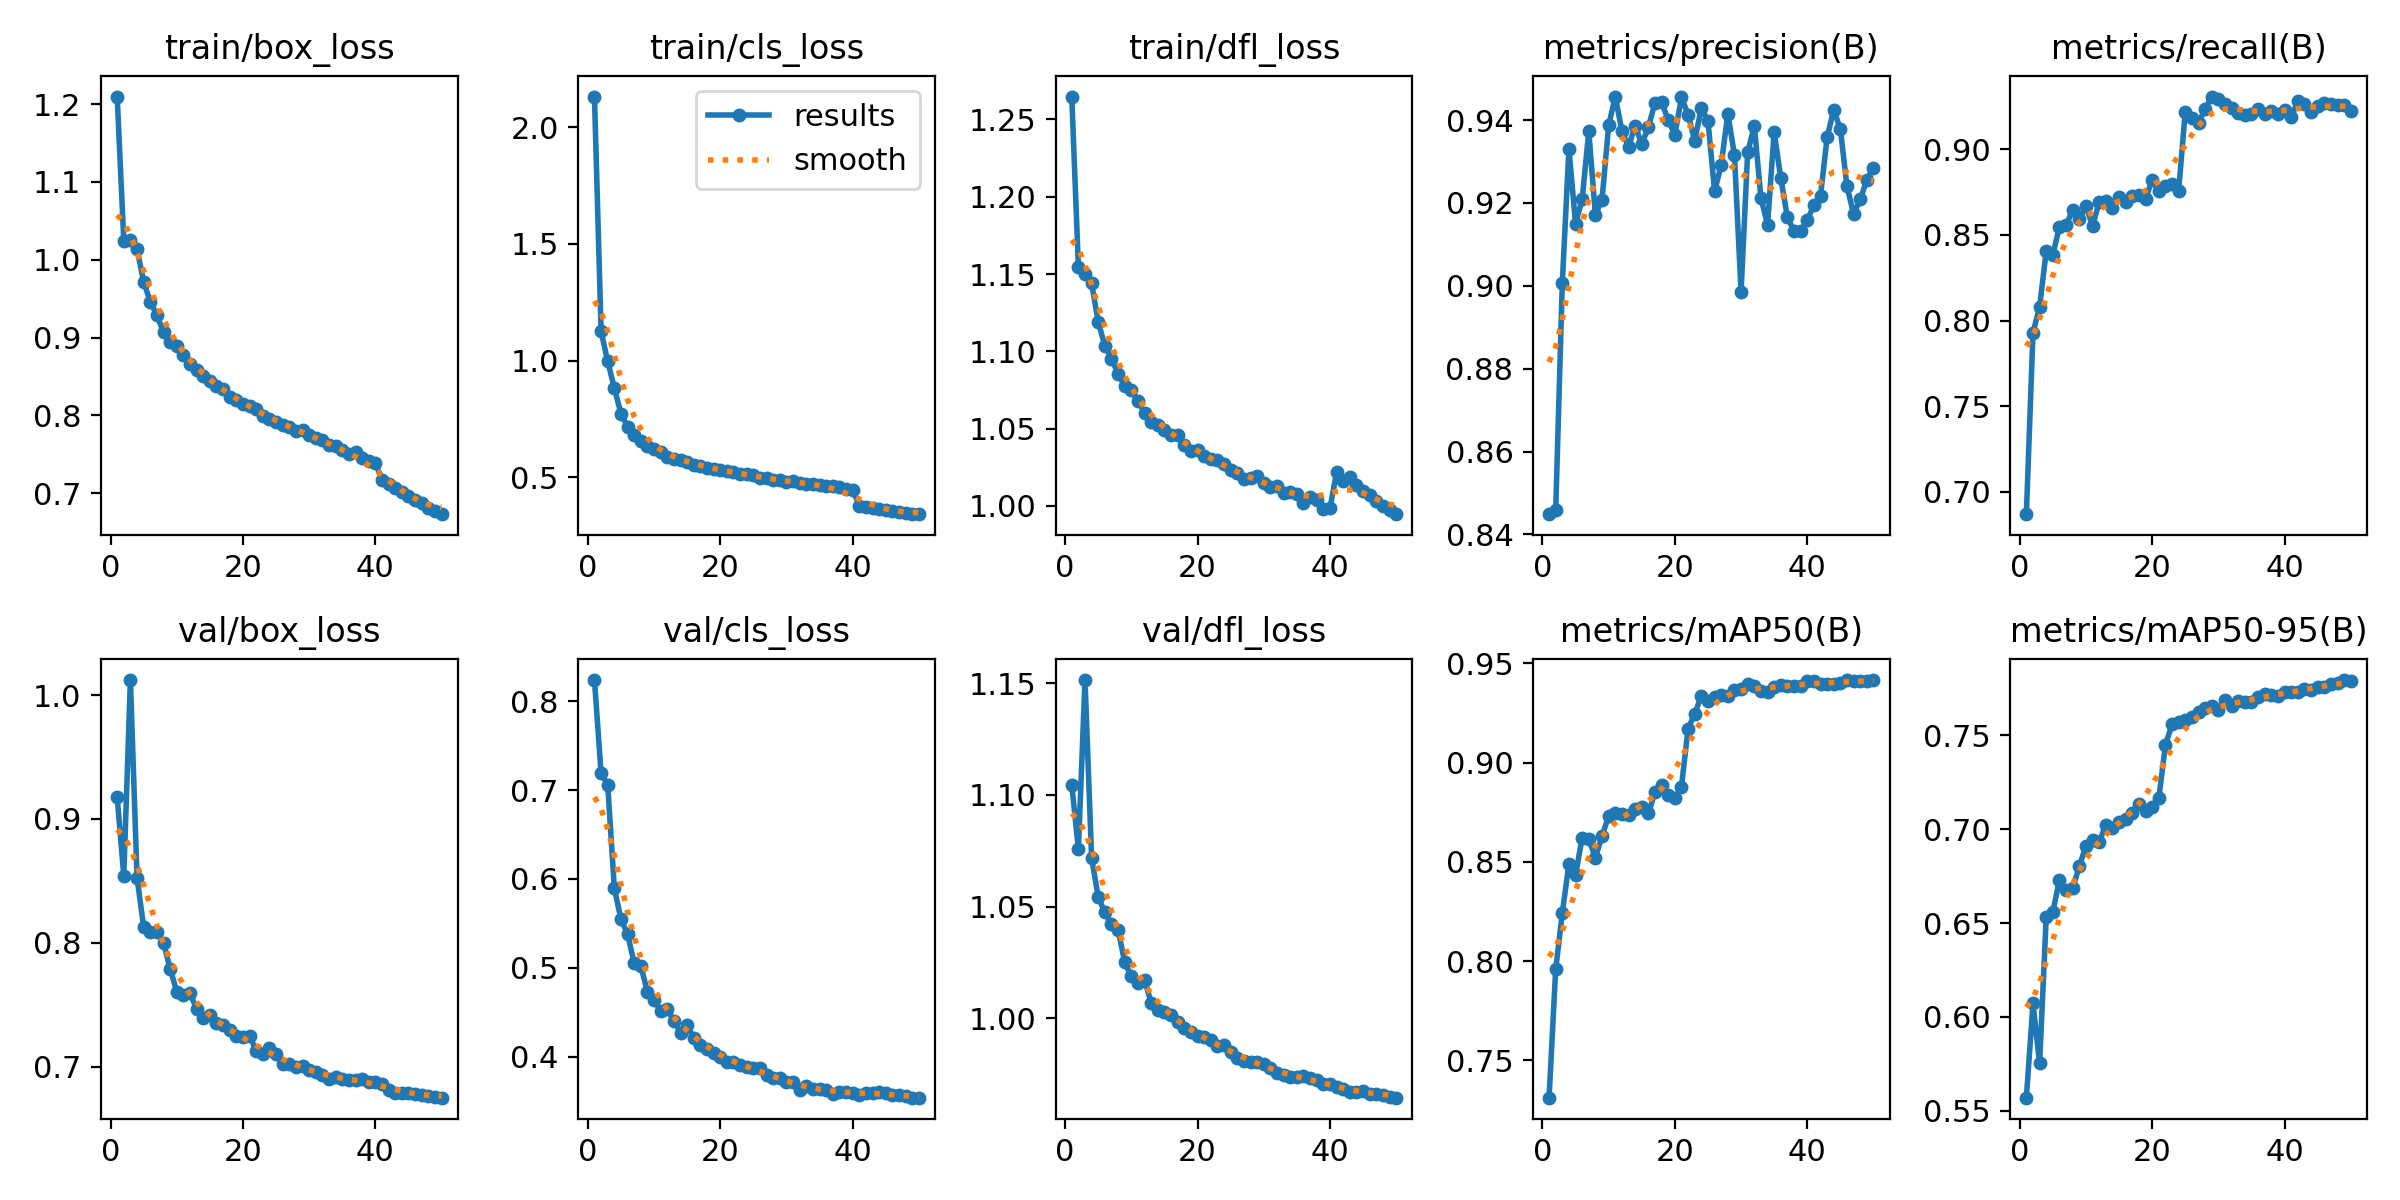

In [4]:
display(Image(filename="runs/detect/train2/results.png"))

#### Matriz de confusão

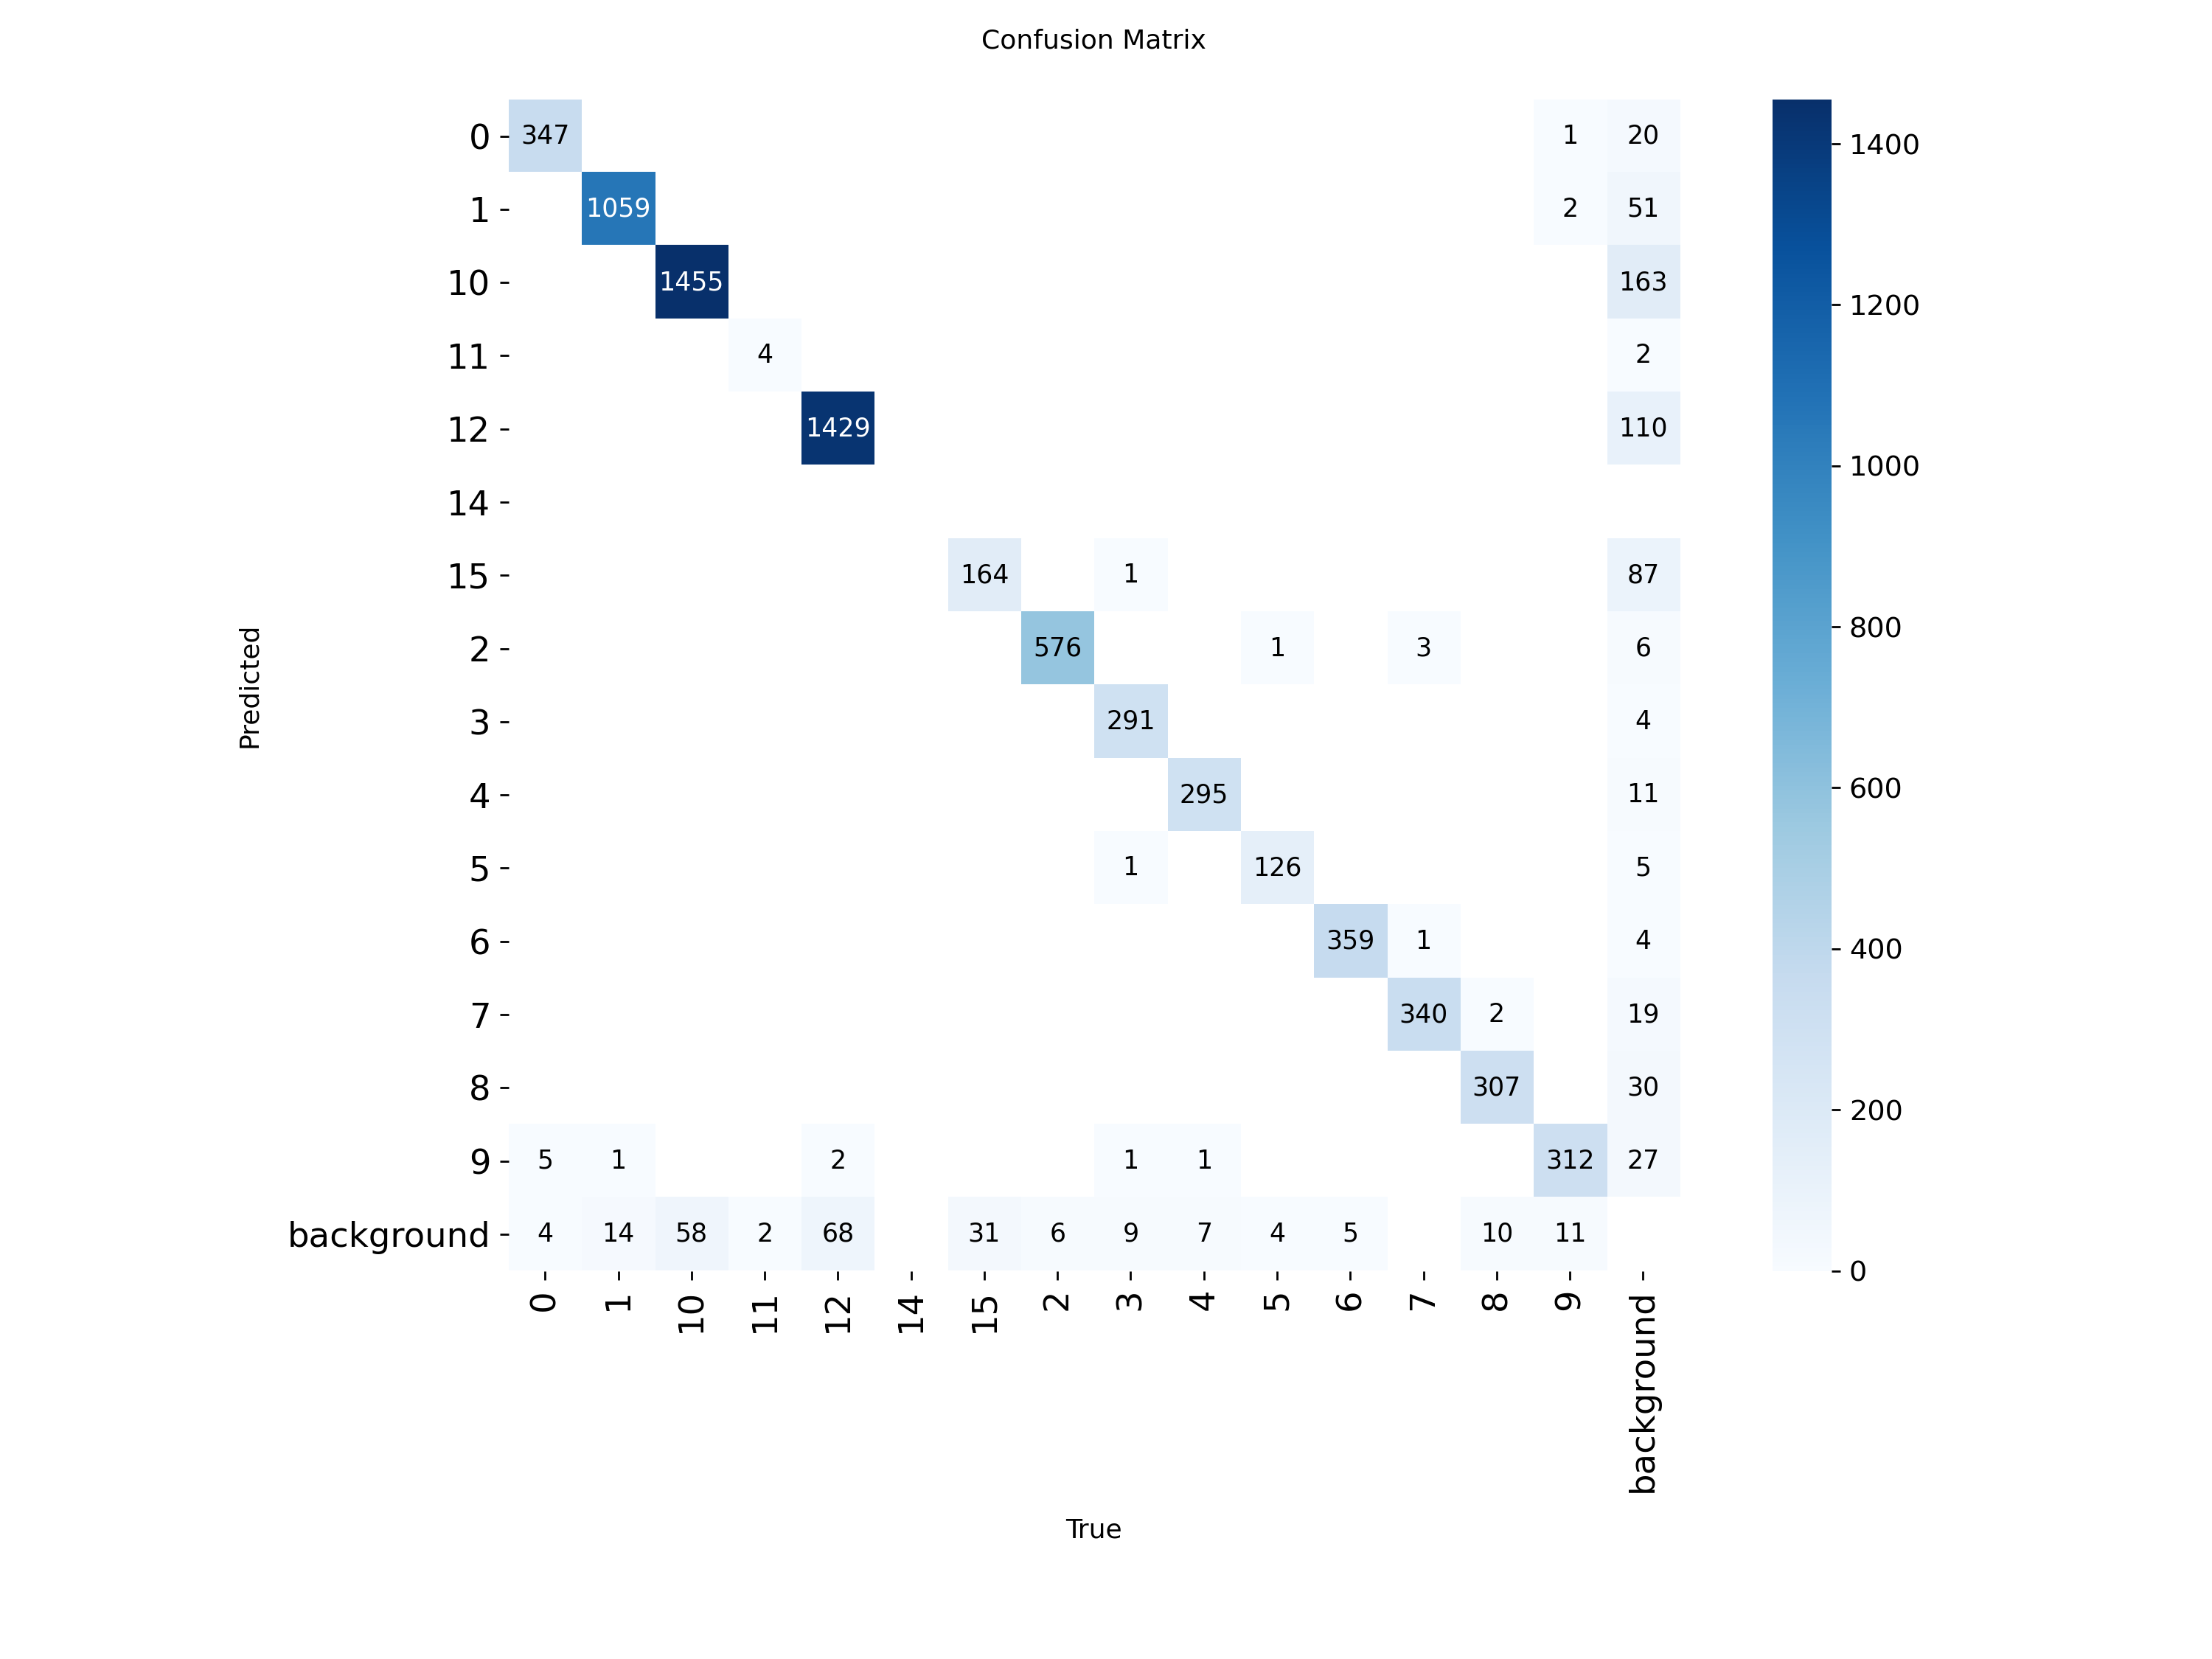

In [5]:
display(Image(filename="runs/detect/train2/confusion_matrix.png"))

#### Precision-recall

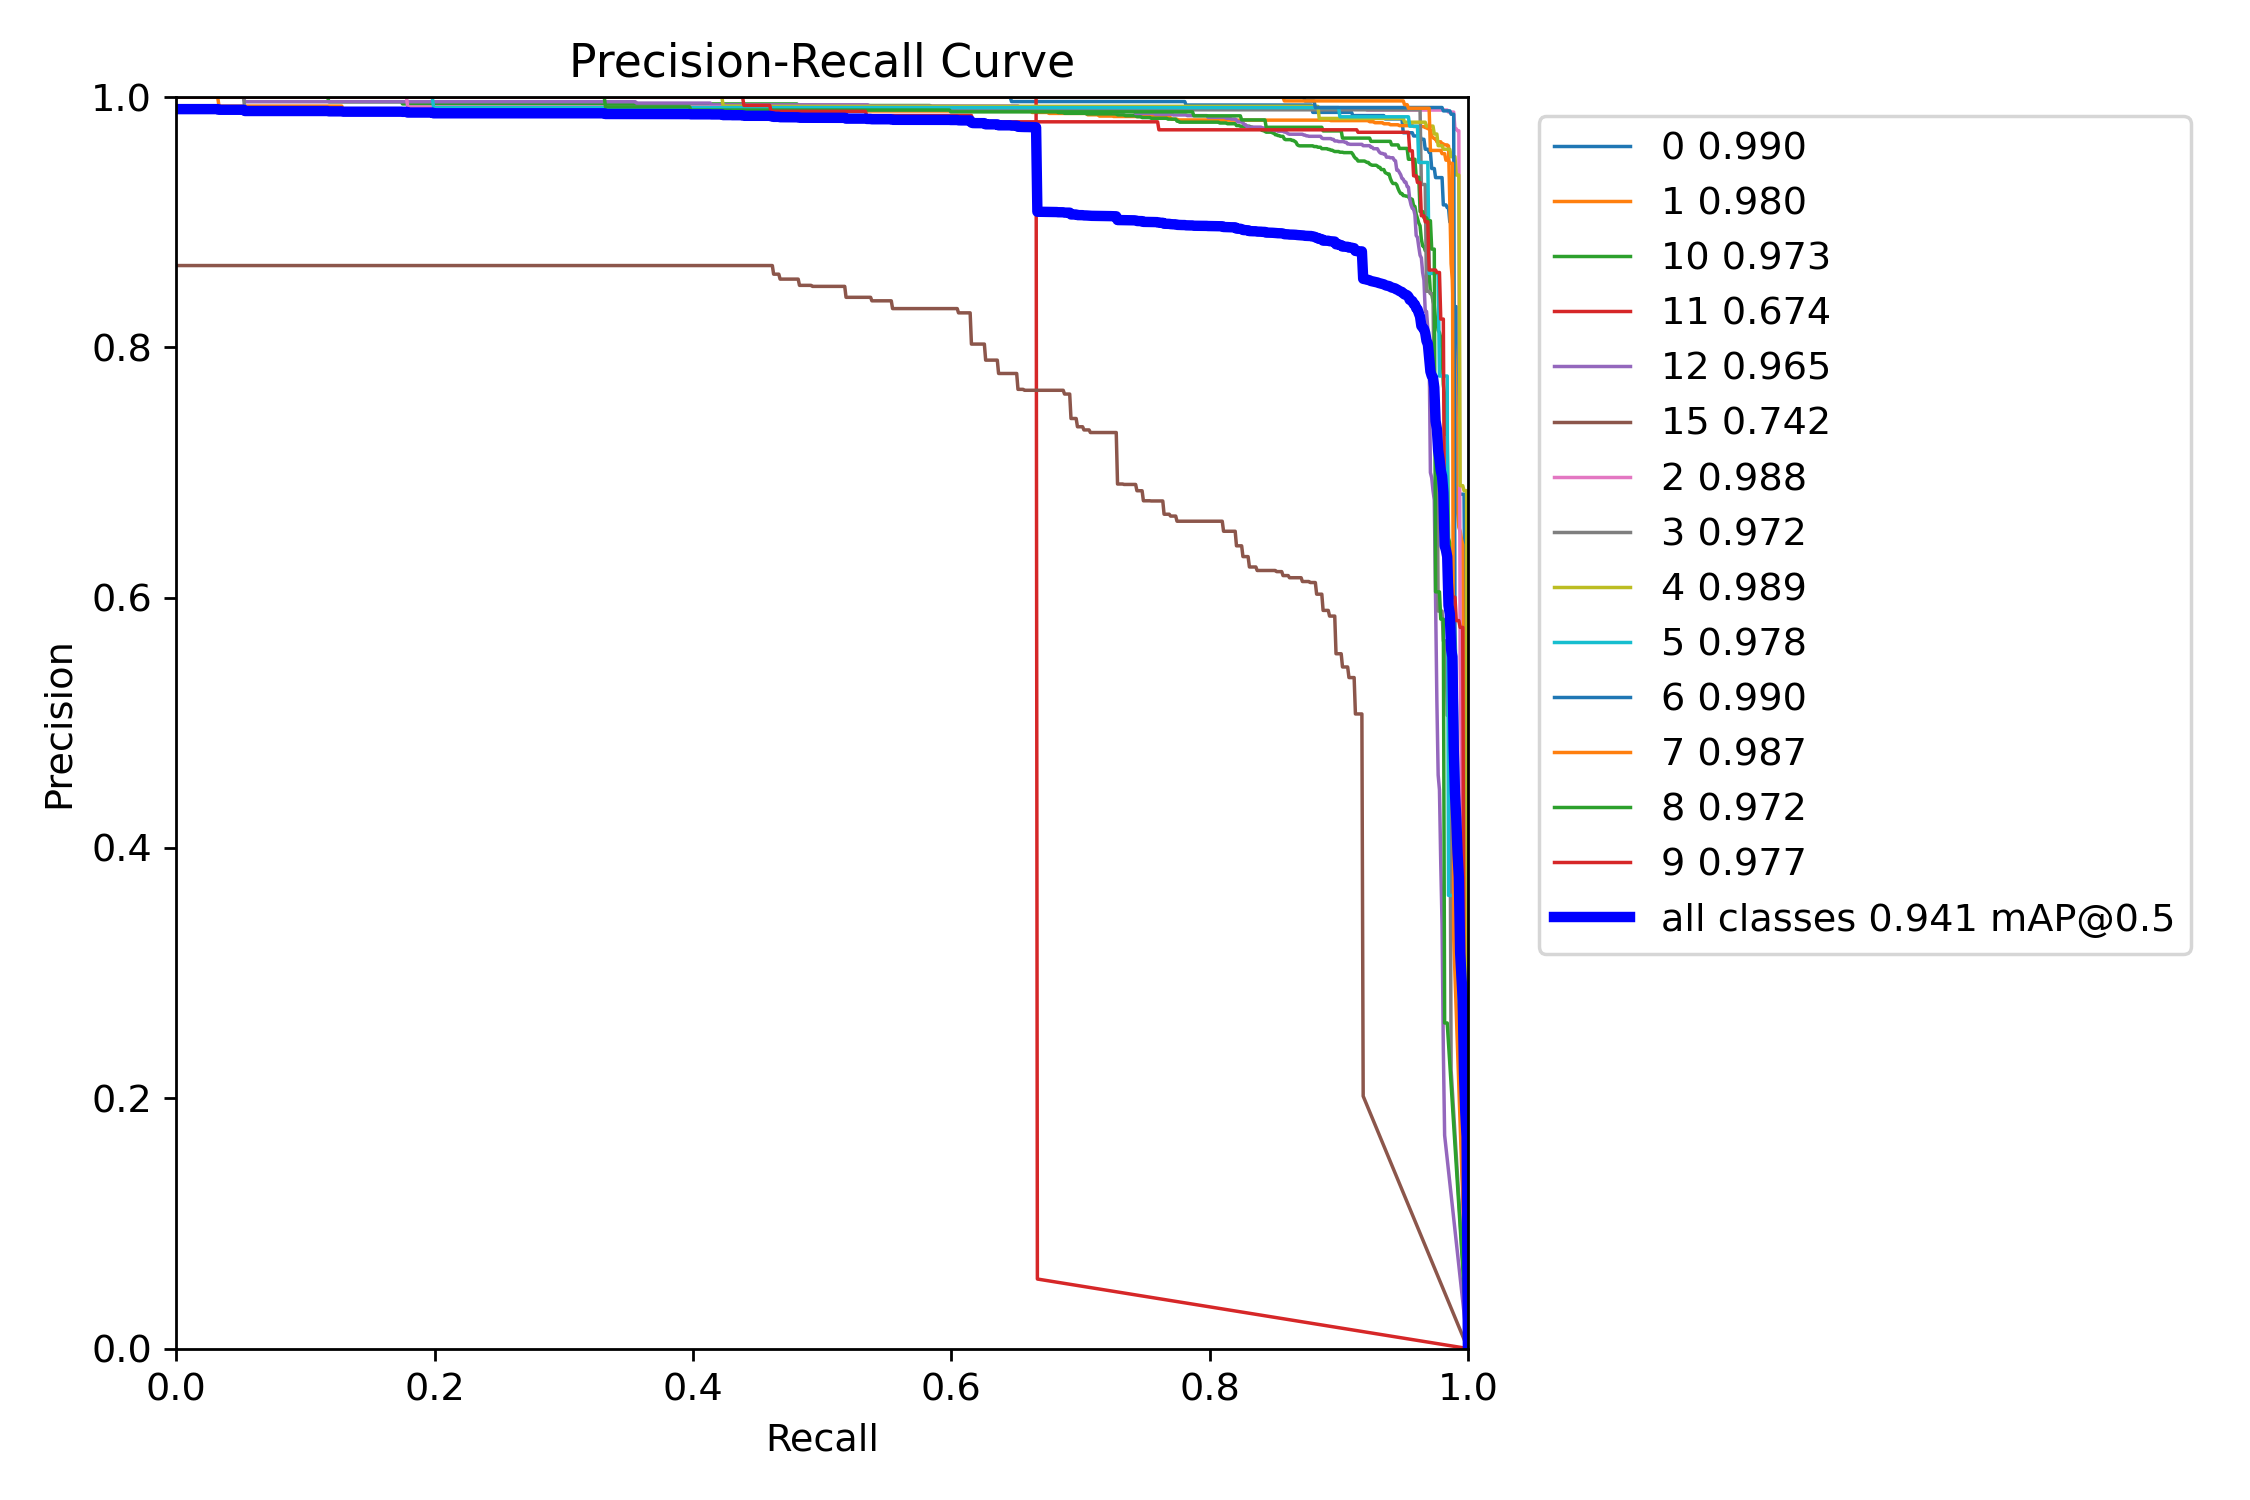

In [6]:
display(Image(filename="runs/detect/train2/BoxPR_curve.png"))

#### F1

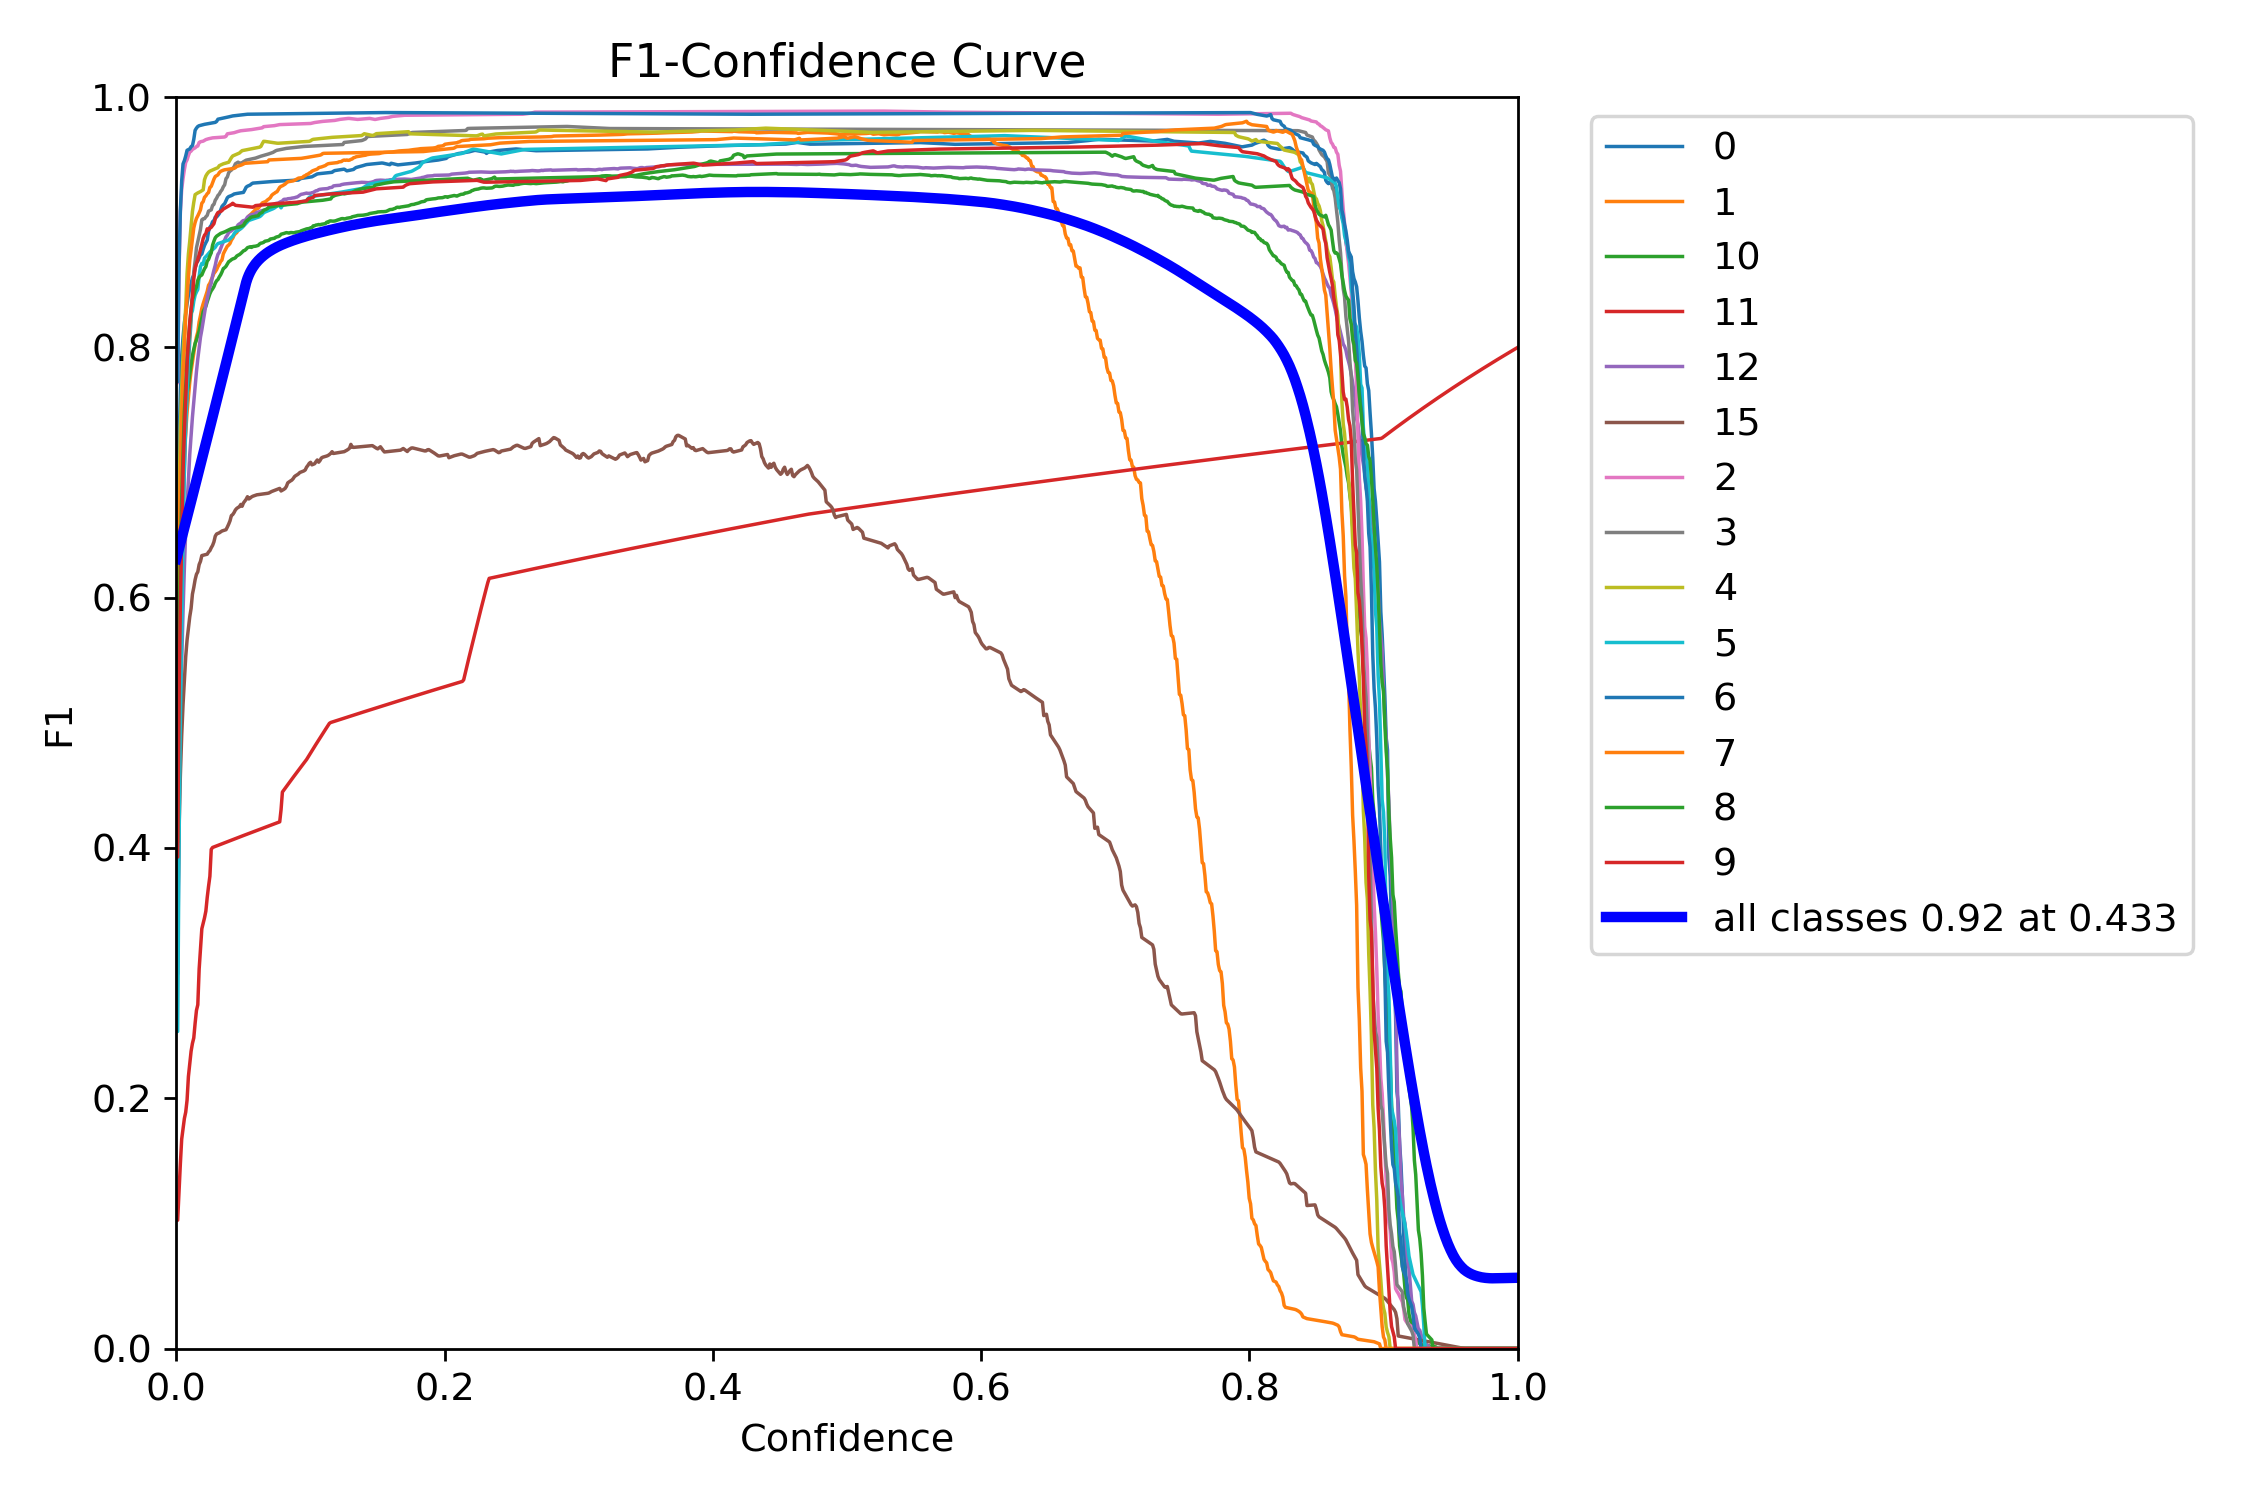

In [7]:
display(Image(filename="runs/detect/train2/BoxF1_curve.png"))

### Heurística de Agrupamento Posicional para Valor Glicêmico

In [ ]:
from PIL import Image
import numpy as np
from ultralytics.utils.plotting import Annotator

pred = results[0]

# Mapeamento nomeado para classes: ex: {0: '0', 1: '1', ..., 14: '9'}
names = pred.names
boxes = pred.boxes.xyxy.cpu().numpy()
classes = pred.boxes.cls.cpu().numpy().astype(int)
confidences = pred.boxes.conf.cpu().numpy()

# Mapeia classes válidas (apenas 0 a 9) para os dígitos reais
digit_map = {
    cls: int(name) for cls, name in names.items()
    if name.isdigit() and int(name) in range(10)
}

# Opcional: encontrar bounding box da classe 10 (número completo)
roi_box = None
for cls, conf, box in zip(classes, confidences, boxes):
    if names[cls] == '10' and conf > 0.5:
        roi_box = box  # [x1, y1, x2, y2]
        break

# Filtra apenas dígitos com confiança alta
digit_preds = []
for cls, conf, box in zip(classes, confidences, boxes):
    if cls in digit_map and conf > 0.8:
        # Se existir ROI (classe 10), só considera dígitos dentro dela
        if roi_box is not None:
            x1, y1, x2, y2 = box
            rx1, ry1, rx2, ry2 = roi_box
            if not (rx1 <= (x1 + x2) / 2 <= rx2 and ry1 <= (y1 + y2) / 2 <= ry2):
                continue
        digit_preds.append((digit_map[cls], conf, box))

# Ordena da esquerda para direita (x1)
digit_preds_sorted = sorted(digit_preds, key=lambda x: x[2][0])

# Concatena os dígitos detectados
valor_glicemico = "".join(str(d[0]) for d in digit_preds_sorted)
print(f"Glicemia estimada: {valor_glicemico} mg/dL")

In [ ]:
pred

In [7]:
import os
from ultralytics import YOLO
from PIL import Image

def redimensionar_jpgs(pasta_entrada, pasta_saida, tamanho=(640, 640)):
    os.makedirs(pasta_saida, exist_ok=True)

    for nome_arquivo in os.listdir(pasta_entrada):
        if nome_arquivo.lower().endswith(".jpg"):
            caminho_entrada = os.path.join(pasta_entrada, nome_arquivo)
            caminho_saida = os.path.join(pasta_saida, nome_arquivo)

            try:
                img = Image.open(caminho_entrada)
                img = img.resize(tamanho)
                img.save(caminho_saida, "JPEG")
                print(f"Redimensionada: {nome_arquivo}")
            except Exception as e:
                print(f"Erro ao redimensionar {nome_arquivo}: {e}")

def processar_pasta_com_modelo(model_path, pasta_imagens, pasta_saida, conf=0.5):
    os.makedirs(pasta_saida, exist_ok=True)
    model = YOLO(model_path)

    for nome_arquivo in os.listdir(pasta_imagens):
        if nome_arquivo.lower().endswith(".jpg"):
            caminho_img = os.path.join(pasta_imagens, nome_arquivo)
            print(f"Processando: {nome_arquivo}")

            # Predição e salvamento na pasta única
            model.predict(
                source=caminho_img,
                conf=conf,
                save=True,
                save_dir=pasta_saida
            )

# ------------------
# Execução principal
# ------------------

# Caminhos personalizados
pasta_origem = r"fotos-reais\Fotos-glico-jpg"
pasta_convertidas = r"fotos-reais\Fotos-glico-jpg-resized"
modelo_pt = r"runs\detect\train2\weights\best.pt"
pasta_resultados = r"fotos-reais\gluco-preds"

# 1. Redimensionar JPGs (sem conversão)
redimensionar_jpgs(pasta_origem, pasta_convertidas)

# 2. Fazer predições e salvar as imagens anotadas
processar_pasta_com_modelo(modelo_pt, pasta_convertidas, pasta_resultados)

Redimensionada: IMG_2941.jpg
Redimensionada: IMG_2952.jpg
Redimensionada: IMG_2953.jpg
Redimensionada: IMG_2954.jpg
Redimensionada: IMG_2955.jpg
Redimensionada: IMG_2956.jpg
Redimensionada: IMG_2957.jpg
Redimensionada: IMG_2958.jpg
Redimensionada: IMG_2967.jpg
Redimensionada: IMG_2968.jpg
Redimensionada: IMG_2969.jpg
Redimensionada: IMG_2970.jpg
Redimensionada: IMG_2971.jpg
Redimensionada: IMG_2972.jpg
Redimensionada: IMG_2973.jpg
Redimensionada: IMG_2980.jpg
Redimensionada: IMG_2982.jpg
Redimensionada: IMG_2983.jpg
Processando: IMG_2941.jpg

image 1/1 E:\tcc-yolo\fotos-reais\Fotos-glico-jpg-resized\IMG_2941.jpg: 640x640 1 1, 1 10, 1 12, 1 2, 1 7, 37.4ms
Speed: 7.0ms preprocess, 37.4ms inference, 10.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict
Processando: IMG_2952.jpg

image 1/1 E:\tcc-yolo\fotos-reais\Fotos-glico-jpg-resized\IMG_2952.jpg: 640x640 1 10, 1 12, 1 2, 1 5, 1 9, 120.3ms
Speed: 58.5ms preprocess, 120.3ms inference, 2.4ms postproce

In [8]:
pasta_origem = r"fotos-reais\glucometer_images"
pasta_convertidas = r"fotos-reais\glucometer_images-resized"
modelo_pt = r"runs\detect\train2\weights\best.pt"
pasta_resultados = r"fotos-reais\gluco-preds"

# 1. Redimensionar JPGs (sem conversão)
redimensionar_jpgs(pasta_origem, pasta_convertidas)

# 2. Fazer predições e salvar as imagens anotadas
processar_pasta_com_modelo(modelo_pt, pasta_convertidas, pasta_resultados)

Redimensionada: 20210821_17_45_55_283_000_rL2kqMTF49hV0ItNsiriKZcad3r1_F_3096_4128.jpg
Redimensionada: 20210822_10_14_41_356_000_zFML3pShSPYJ5zVUd9nMmwkObIo1_F_2448_3264.jpg
Redimensionada: 20210823_11_12_06_439_000_bZy8xPq1p3WTOXBy9pDMqQeh9sq1_F_3264_2448.jpg
Redimensionada: 20210823_12_54_58_028_000_RpnyZTKRPiTM6SH5vmplbCNYUHb2_F_3000_4000.jpg
Redimensionada: 20210823_20_59_42_354_000_3FQ7xpkMmcdRS27U2bBCBMfyWxs1_F_4000_3000.jpg
Redimensionada: 20210824_13_12_36_191_000_T54lKx4A7QZiDCdTrSViCqgiLD42_F_4032_3024.jpg
Redimensionada: 20210824_13_19_07_439_000_T54lKx4A7QZiDCdTrSViCqgiLD42_F_4032_3024.jpg
Redimensionada: 20210824_19_06_01_482_000_wVWQl3sChLhOS2A42U7bbgydQj13_F_3096_4128.jpg
Redimensionada: 20210824_19_06_21_422_000_wVWQl3sChLhOS2A42U7bbgydQj13_F_3096_4128.jpg
Redimensionada: 20210824_19_06_49_311_000_wVWQl3sChLhOS2A42U7bbgydQj13_F_3096_4128.jpg
Redimensionada: 20210824_20_51_50_803_000_ZaG8yzjrIdPimkMRBMHzy2ylhP62_T_5120_3840.jpg
Redimensionada: 20210825_07_12_49_940_000_T